In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('zbior_23.csv',encoding = 'utf8',sep=';')
X = df[['M_C', 'M_A', 'SYM', 'P', 'T']].values
y = df[['EXP U']].values

In [3]:
'''Przygotowanie danych - podzielenie danych na zbiór trenujacy i testowy'''

X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size = 0.4, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print('Test shapes')
print(X_test.shape)
print(y_test.shape)

(1719, 5)
(1719, 1)
Test shapes
(1146, 5)
(1146, 1)


In [4]:
# Skalowanie cech dla lepszej wydajności modelu GB
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [6]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [7]:
y_test_gb = gb_model.predict(X_test)
y_train_gb =gb_model.predict(X_train)

In [8]:
### Metryki dla zbioru testowego
r2 = r2_score(y_test, y_test_gb)
print(f"Współczynnik determinacji R^2: {r2}")
mse = mean_squared_error(y_test, y_test_gb)
print(f"Błąd średniokwadratowy MSE: {mse}")

Współczynnik determinacji R^2: 0.9894548938999617
Błąd średniokwadratowy MSE: 346.3859352402857


In [9]:
###MEtryki dla zbioru treningowego
r2_train = r2_score(y_train, y_train_gb)
print(f"Współczynnik determinacji R^2: {r2_train}")
mse_train = mean_squared_error(y_train, y_train_gb)
print(f"Błąd średniokwadratowy MSE: {mse_train}")

Współczynnik determinacji R^2: 0.9917555597315069
Błąd średniokwadratowy MSE: 293.09888792499663


## Walidacja krzyżowa

In [10]:
# Przeprowadź walidację krzyżową z 5 foldami i oblicz R^2 jakość modelu
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=25, scoring='r2')
# Oblicz średnią wartość R^2 po wszystkich foldach
mean_r2 = cv_scores.mean()
print("Średni R^2 po walidacji krzyżowej:", mean_r2)

Średni R^2 po walidacji krzyżowej: 0.9881888919503987


In [11]:
# Przeprowadź walidację krzyżową z 5 foldami i oblicz R^2 jakość modelu
cv_scores_test = cross_val_score(gb_model, X_test, y_test, cv=25, scoring='r2')
# Oblicz średnią wartość R^2 po wszystkich foldach
mean_r2_test = cv_scores_test.mean()
print("Średni R^2 po walidacji krzyżowej:", mean_r2_test)

Średni R^2 po walidacji krzyżowej: 0.9859403293764385


## Wykresy R2 

In [12]:
test_predictions_gb = pd.Series(y_test_gb)
pred_df = pd.DataFrame(y_test,columns = ['Test TRUE Y'])
pred_df = pd.concat([pred_df,test_predictions_gb],axis = 1)
pred_df.columns = ['Test true y', 'Pred']

In [13]:
train_predictions_gb = pd.Series(y_train_gb)
train_df = pd.DataFrame(y_train,columns = ['Test TRUE Y'])
train_df = pd.concat([train_df,train_predictions_gb],axis = 1)
train_df.columns = ['Test true y', 'Pred']

<Axes: xlabel='Test true y', ylabel='Pred'>

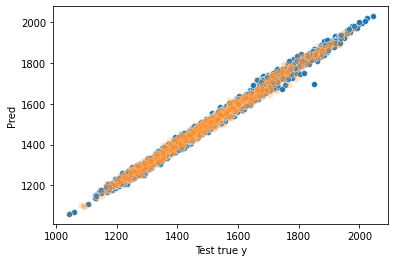

In [14]:
sns.scatterplot(x = 'Test true y', y = 'Pred', data = train_df)
sns.scatterplot(x = 'Test true y', y = 'Pred', data = pred_df, alpha = 0.2)

In [15]:
train_df

,Test true y,Pred
0,1613.37,1603.780746
1,1314.90,1329.026457
2,1800.81,1804.019400
3,1267.31,1270.382940
4,1582.90,1580.490182
...,...,...
1714,1377.30,1374.660222
1715,1360.43,1366.917359
1716,1246.87,1253.147962
1717,1557.03,1564.542897


In [16]:
pred_df

,Test true y,Pred
0,1252.40,1262.544421
1,1525.30,1487.031750
2,1481.59,1462.363381
3,1410.40,1385.526970
4,1537.50,1529.127354
...,...,...
1141,1485.86,1511.844564
1142,1309.19,1319.849298
1143,1471.30,1486.221626
1144,1485.40,1503.250383


# Zapis zbioru testowego i treningowego

In [17]:
import os
directory_path = 'D:/PhD/ML/GradientBoosting/U'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
# train_df.to_csv(os.path.join(directory_path, 'train_set_GB_U.csv'), sep=';', encoding='utf-8')
# pred_df.to_csv(os.path.join(directory_path, 'test_set_GB_U.csv'), sep=';', encoding='utf-8') 

#  Schemat obliczeń dla konkretnej cieczy jonowej

In [18]:
def predictions3(MC,MA,SYM,P,T):
    res = []
    for j in T:
        for i in P:
            new_geom = [[MC,MA,SYM,i,j]]
            new_geom = scaler.transform(new_geom)
            res.append(gb_model.predict(new_geom))
            #print(model.predict(new_geom))
    return res

In [19]:
nazwa = 'C2Mim_C1SO3'
Mcat = 111.092
Man = 94.981

P = [0.1,15,30,46,61]
T = [293.15,298.15,303.15,313.15,323.15]
result = predictions3(Mcat,Man,0,P,T);

In [20]:
res_flat = np.array(result).flatten()  # przekształcenie do jednowymiarowej tablicy numpy
res_numerical = [val.item() for val in res_flat]  # wyodrębnienie wartości liczbowych
for i in res_numerical:
    print(i)

1727.1944980681278
1744.2001570877326
1820.8753729796967
1854.463669819922
1877.7539675293137
1720.0014214244823
1737.3989580630362
1814.0741739550003
1847.6624707952255
1872.2854816467188
1692.145736995544
1714.3338613135095
1808.9131625288308
1826.9172859750317
1851.540296826525
1661.7380236491276
1684.066024110894
1788.9556740054559
1806.9597974516569
1822.5076276242946
1640.6769431973275
1663.004943659094
1788.9556740054559
1806.9597974516569
1822.5076276242946


In [21]:
import os
directory_path = 'D:/PhD/ML/GradientBoosting/U/'
directory_path + nazwa 
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
tablica_danych = np.array(res_numerical).reshape(len(T), len(P))
dane = pd.DataFrame(tablica_danych)
dane = dane.T
dane.to_excel(directory_path+nazwa+'_U_DATA_GB.xlsx', index=False)